## **Question Answering App using HuggingFace Model**
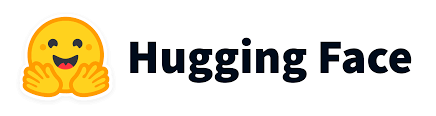
### **DistilBERT base uncased distilled SQuAD Open source Model**


#### How to Get Started with the Model?

In [1]:
# Use a pipeline as a high-level helper
from transformers import pipeline

llm = pipeline("question-answering", model="distilbert/distilbert-base-cased-distilled-squad")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [2]:
context = "my name is Ahmed and i live in Egypt"
question = "where do i live?"
llm(question = question, context = context)

{'score': 0.9858724474906921, 'start': 31, 'end': 36, 'answer': 'Egypt'}

In [3]:
result = llm(question = question, context = context)
print(result['answer'])

Egypt


In [5]:
context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example     of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the examples/pytorch/question-answering/run_squad.py script.
"""

question = "What is a good example of a question answering dataset?"

result = llm(question = question, context = context)
print(result['answer'])

SQuAD dataset


### Here is how to use this model in PyTorch:



In [6]:
from transformers import DistilBertTokenizer, DistilBertForQuestionAnswering
import torch
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased-distilled-squad')
model = DistilBertForQuestionAnswering.from_pretrained('distilbert-base-uncased-distilled-squad')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

In [7]:
question, text = "Who was Jim Henson?", "Jim Henson was a nice puppet"

inputs = tokenizer(question, text, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

answer_start_index = torch.argmax(outputs.start_logits)
answer_end_index = torch.argmax(outputs.end_logits)

predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index + 1]
tokenizer.decode(predict_answer_tokens)

'a nice puppet'